# Residual Histogram
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [5]:
#!./get_logs.sh 100000
!./parse_logs.sh
!ls ../data/

metric.csv  safirortb.log


In [6]:
import numpy as np
import os
from stats_util import Type, get_serie

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 2.23000000e+02, 1.29000000e+02, ...,
        1.71600000e-01, 1.10000000e+01, 1.66000000e+02],
       [2.01812112e+13, 1.87000000e+02, 1.11000000e+02, ...,
        1.68600000e-01, 3.90000000e+01, 1.56000000e+02],
       [2.01812112e+13, 1.76000000e+02, 1.09000000e+02, ...,
        2.19000000e-01, 5.00000000e+01, 2.13000000e+02],
       ...,
       [2.01812112e+13, 2.41000000e+02, 1.04000000e+02, ...,
        7.37000000e-02, 6.00000000e+00, 2.06000000e+02],
       [2.01812112e+13, 2.55000000e+02, 1.12000000e+02, ...,
        7.32000000e-02, 4.00000000e+00, 2.20000000e+02],
       [2.01812112e+13, 2.45000000e+02, 9.60000000e+01, ...,
        6.96000000e-02, 2.00000000e+00, 1.92000000e+02]])

In [7]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(231.80414312617702, 661.3740694635075)

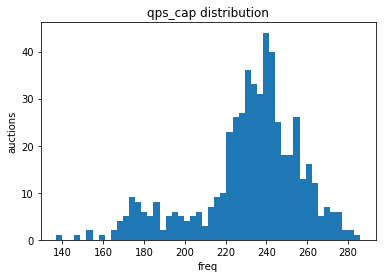

In [8]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),fn.var()

(104.11299435028249, 181.38836222030707)

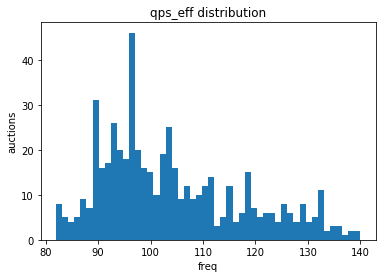

In [9]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),fn.var()

(0.004366666666666667, 3.1819209039548024e-07)

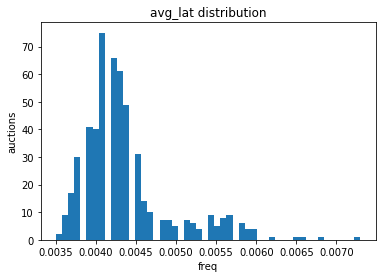

In [10]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),fn.var()

(201.9322033898305, 529.3626352580676)

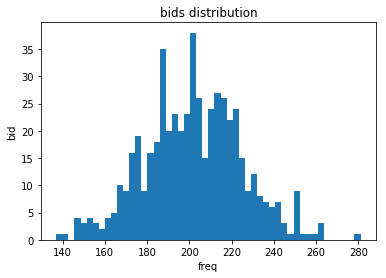

In [11]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),fn.var()

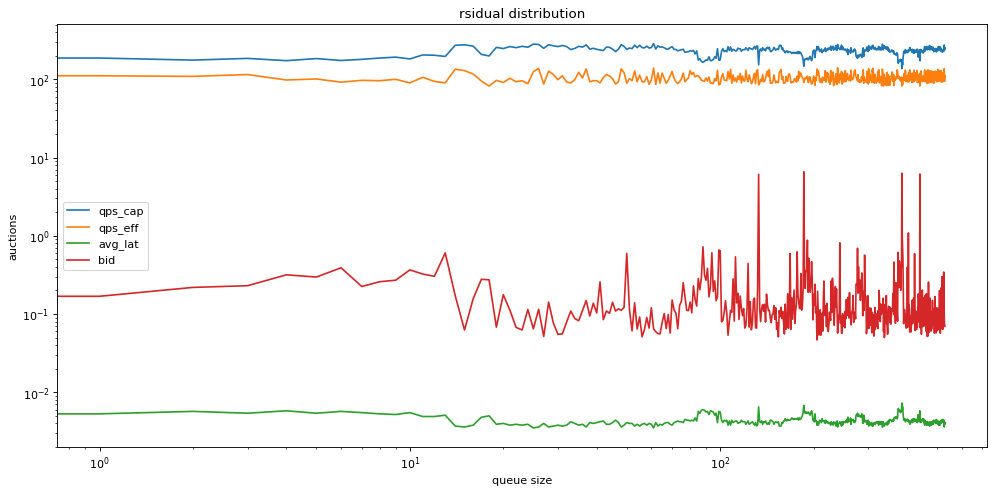

In [13]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()